# RANSAC fitting

- Course:  Computer Vision
- Student: Kaixin Chen (1951724)
- Tutor:   Prof. Lin Zhang

## Question
RANSAC is widely used in fitting models from sample points with outliers. Please implement a program to fit a straight 2D line using RANSAC from the following sample points:$(-2, 0), (0, 0.9), (2, 2.0), (3, 6.5), (4, 2.9), (5, 8.8), (6, 3.95), (8, 5.03), (10, 5.97), (12, 7.1), (13, 1.2), (14, 8.2),(16, 8.5) (18, 10.1)$. Please show your result graphically

## Environment Setup

In [40]:
import random

import matplotlib.pyplot as plt
from random import sample
import numpy as np

## Load Sample Points

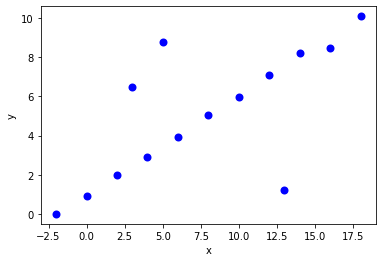

In [41]:
points=np.array([(-2, 0), (0, 0.9), (2, 2.0), (3, 6.5),
        (4, 2.9), (5, 8.8), (6, 3.95), (8, 5.03),
        (10, 5.97), (12, 7.1), (13, 1.2), (14, 8.2),
        (16, 8.5), (18, 10.1)])

x_list=[i[0] for i in points]
y_list=[i[1] for i in points]

# sample points visualization
plt.scatter(x_list,y_list,color='b',linewidth=2,label="Sample Points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()




## Algorithm Process

The following code explains every step of RANSAC process with comments.

In [42]:
def ransac(sample_points):
    # initialization of RANSAC params
    epoch=50 # the total number of trials
    current_epoch=1
    random_nums=2 # randomly select two point (linear regression when larger than 2)
    distance_threshold=0.5 # to tell a point is inlier or outlier
    inlier_rate=0.8  # in this case, T=0.8*len(sample_points)
    best_k=0
    best_b=0
    inlier_last_num=0 # the number of inlier points in the last trial
    final_inlier_list=[]


    for _ in range(epoch):
        # Step 1: randomly select 2 data points
        p1,p2=random.sample(sample_points.tolist(),random_nums)
        (x1,y1)=p1
        (x2,y2)=p2

        # Step 1: instantiate the model (line in this case)
        k=(y1-y2)/(x1-x2)
        b=y1-k*x1

        # Step 2: determine inliers set of data points
        inlier_list=[]

        # extract inliers by the distance
        for point in sample_points:
            (x0,y0)=point
            # point-line distance: |kx-y+b|/sqrt(k^2+1)
            dist=np.abs(k*x0-y0+b)/np.sqrt(pow(k,2)+1)
            if dist<distance_threshold:
                inlier_list.append(point)


        if len(inlier_list)>inlier_last_num:
            inlier_last_num=len(inlier_list)
            best_k=k
            best_b=b

        inlier_num_threshold=round(len(sample_points)*inlier_rate)

        # Step 3&4:
        if len(inlier_list)<inlier_num_threshold:
            # Step 4:insufficient inlier points
            # select a new subset and repeat
            current_epoch+=1
            continue
        else:
            # Step 3: sufficient inlier points
            # terminate with current subset
            final_inlier_list=inlier_list
            break

    print("total epoch: {}".format(str(current_epoch)))
    print("total inlier points: {}".format(str(inlier_last_num)))
    print("inlier points: {}".format(str(final_inlier_list)))
    print("best k: {}".format(str(best_k)))
    print("best b: {}".format(str(best_b)))
    print("result: y={}x+{}".format(best_k,best_b) )

    return best_k,best_b

## Result Display

total epoch: 9
total inlier points: 11
inlier points: [array([-2.,  0.]), array([0. , 0.9]), array([2., 2.]), array([4. , 2.9]), array([6.  , 3.95]), array([8.  , 5.03]), array([10.  ,  5.97]), array([12. ,  7.1]), array([14. ,  8.2]), array([16. ,  8.5]), array([18. , 10.1])]
best k: 0.46999999999999975
best b: 1.2700000000000022
result: y=0.46999999999999975x+1.2700000000000022


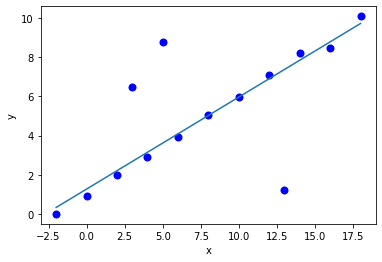

In [43]:
plt.scatter(x_list,y_list,color='b',linewidth=2,label="Sample Points")
plt.xlabel("x")
plt.ylabel("y")

k_fit,b_fit=ransac(points)
fit_y_list=[k_fit*x+b_fit for x in x_list]
plt.plot(x_list,fit_y_list)
plt.show()
